# Принятие решений в бизнесе на основе данных

# Описание проекта:

**Контекст** 

Мы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Проект выполнен на платформе Яндекс-Практикум, Вяжевым Даниилом Юрьевичом от 05.05.2022**

# Оглавление:

<a id='content'></a>
**[1  Шаг. Подготовка данных к анализу](#part_1)** 
* [Вывод](#part_1.1)

**[2 Шаг. Часть 1 Приоритезация гипотез](#part_2)**  
* [Вывод](#part_2.1)

**[3  Шаг. Часть 2 Анализ A/B тестаз](#part_3)**  
* [Изучим количество посещений в каждой группе](#part_3.1)
* [Изучим количество заказов в каждой группе](#part_3.2)
* [Приготовим таблицу с кумулятивными данными по выручке и посещениям](#part_3.3)
* [Построим графику кумулитивного среднего чека по группам](#part_3.4)
* [Подготовим таблицу для графика относительного изменения кумулятивного чека и построим график](#part_3.5)
* [Изучим аномалии](#part_3.6)
* [Изучим количество заказов](#part_3.7)
* [Вывод](#part_3.8)

**[4  Шаг. Часть 2 Статистическая значимость](#part_4)**  
* [Сформируем таблицы с пользователями без заказов](#part_4.1)
* [Проведение очистки данных](#part_4.2)
* [Подготовим данные для визуализации кумулятивной выручки](#part_4.3)

**[5  Шаг. Вывод](#part_4)**  

<a id='part_1'></a>
## Шаг. Подготовка данных к анализу 

In [1]:
# импорт необходимых библиотек и настройка jupiter
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# для отображения в jupiter всех колонок и столбцов df + сокращу количество цифр после запятой
pd.options.display.max_colwidth = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision',2)

In [2]:
# загрузим таблицы и проанализируем их содержимое
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
display(hypothesis.head())
display(hypothesis.info())
display(hypothesis.describe())
print('Дубликатов:', hypothesis.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


Дубликатов: 0


In [4]:
# поменяем регистр заголовков
hypothesis_columns = (hypothesis.columns).str.lower()
hypothesis.columns=hypothesis_columns
hypothesis.sample()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


In [5]:
display(orders.head())
display(orders.info())
display(orders.describe())
print('Дубликаты:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.20e+03,1.20e+03,1.20e+03
mean,2.16e+09,2.17e+09,8.35e+03
std,1.23e+09,1.24e+09,3.92e+04
min,1.06e+06,5.11e+06,5.00e+01
25%,1.17e+09,1.11e+09,1.22e+03
50%,2.15e+09,2.22e+09,2.98e+03
75%,3.24e+09,3.18e+09,8.29e+03
max,4.29e+09,4.28e+09,1.29e+06


Дубликаты: 0


In [6]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Поменяли формат даты на коррректный.**

In [7]:
display(visitors.head())
display(visitors.info())
display(visitors.describe())
print('Дубликаты:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


Дубликаты: 0


In [8]:
print('Дата начала теста:', visitors['date'].min(), 'Дата окончания теста:', visitors['date'].max(), '\n')
print('Количество групп в A/B тесте:', visitors['group'].count(),'\n')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info() 


Дата начала теста: 2019-08-01 Дата окончания теста: 2019-08-31 

Количество групп в A/B тесте: 62 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Так же поменяли формат даты на коррректный.**

In [9]:
print ('Количество пользователей в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество пользователей в группе B -',visitors.query('group == "B"')['visitors'].sum())
print('Всего пользователей:',visitors.query('group == "A"')['visitors'].sum() + visitors.query('group == "B"')['visitors'].sum() )

Количество пользователей в группе А - 18736
Количество пользователей в группе B - 18916
Всего пользователей: 37652


<a id='part_1.1'></a>
### Вывод:
Данные подготовлены, проблем не возникло, дату перевели в нужный нам формат, изменили регистр.

Определили дату начала и окончания теста - `2019-08-01` и `2019-08-31` соотвественно.

Количество групп в A/B тесте: 62.

Всего пользователей 37652, из них 18736 в группе А и В 18916. Так же нужно будет внимательно рассмотреть проблему неравенства групп и найти причины этой аномалии, на первое время, предположим, что в обеих группах могут быть одни и те же пользователи из двух групп одновременно.

<a id='part_2'></a>
## Шаг. Часть 1 Приоритезация гипотез

Определим приоритет гипотез при помощи `ICE ( Impact, Confidence, Efforts )` & `RICE ( Rearch, Impact, Confidence, Efforts )`

Используем следующую формулу: `ICE = Impact * Confidence / Efforts` & `RICE = Rearch * Impact * Confidence / Efforts`

In [10]:
hypothesis['ICE'] = (hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Приоритет на стороне 8, 0 и 7 гипотез.**

In [11]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Приоритет на стороне 7, 2 и 0 гипотез.**

<a id='part_2.1'></a>
### Вывод:
В топ-3 гипотез выделим: 7, 2 и 0 гипотезу, поскольку охват у 8 гипотезы ничтожно мал.

<a id='part_3'></a>
## Шаг. Часть 2 Анализ A/B теста

<a id='part_3.1'></a>
### Изучим количество посещений в каждой группе.

In [12]:
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum())
print ('Разница посещений в группах:',visitors.query('group == "B"')['visitors'].sum() - visitors.query('group == "A"')['visitors'].sum() )

Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
Разница посещений в группах: 180


<a id='part_3.2'></a>
### Изучим количество заказов в каждой группе.

In [13]:
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])
print ('Разница заказов в группах:',orders.query('group == "B"').shape[0] - orders.query('group == "A"').shape[0])

Количество заказов в группе А - 557
Количество заказов в группе B - 640
Разница заказов в группах: 83


**Присутствует значительная разница посещений в группах. Проверим, не попали ли одни и те же пользователи в разные группы.**

In [14]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()

In [15]:
(orders.groupby('visitorId')['group'].nunique()>1).count()

1031

In [16]:
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

In [17]:
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество заказов в группе А - 468
Количество заказов в группе B - 548


Уменьшили разницу до 80, учтём эту разницу.

<a id='part_3.3'></a>
### Приготовим таблицу с кумулятивными данными по выручке и посещениям:

In [18]:
dates_groups = orders[['date','group']].drop_duplicates()
orders_aggregated = (dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                            , orders['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))
orders_aggregated.rename(columns={'transactionId':'orders'}, inplace=True)
orders_aggregated.head()

,date,group,revenue,orders
55,2019-08-01,A,142779,23
66,2019-08-01,B,59758,17
175,2019-08-02,A,234381,42
173,2019-08-02,B,221801,40
291,2019-08-03,A,346854,66


In [19]:
visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [20]:

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()

,date,group,revenue,orders,visitors
0,2019-08-01,A,142779,23,719
1,2019-08-01,B,59758,17,713
2,2019-08-02,A,234381,42,1338
3,2019-08-02,B,221801,40,1294
4,2019-08-03,A,346854,66,1845


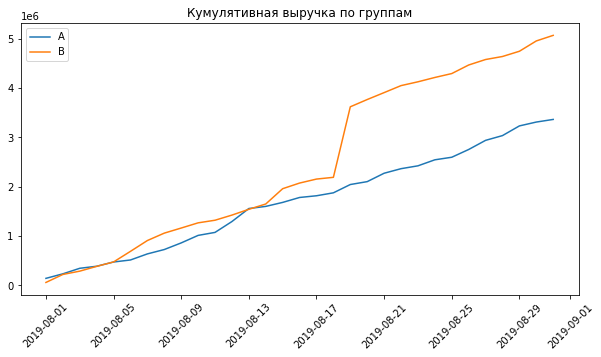

In [21]:
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders','visitors']]

plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.legend();

**Вывод:** Кумулятивная выручка в обоих группах постепенно росла, затем 17 августа был резкий всплеск, нужно проверить на наличие аномалий.

<a id='part_3.4'></a>
### Построим графику кумулитивного среднего чека по группам:

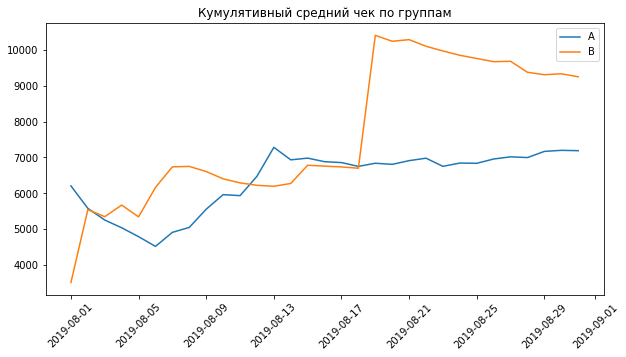

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'] / cumulative_a['orders'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'] / cumulative_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.legend();

Действительно, в группе В есть крупная покупка после 2019-08-17, после чего и происходит резкий всплеск.

<a id='part_3.5'></a>
### Подготовим таблицу для графика относительного изменения кумулятивного чека и построим график:

In [23]:
merged_cumulative = cumulative_a.merge(cumulative_b, on=['date'],suffixes=('_a', '_b'))
merged_cumulative.sample()

,date,revenue_a,orders_a,visitors_a,revenue_b,orders_b,visitors_b
13,2019-08-14,1601692,231,9058,1650268,263,9056


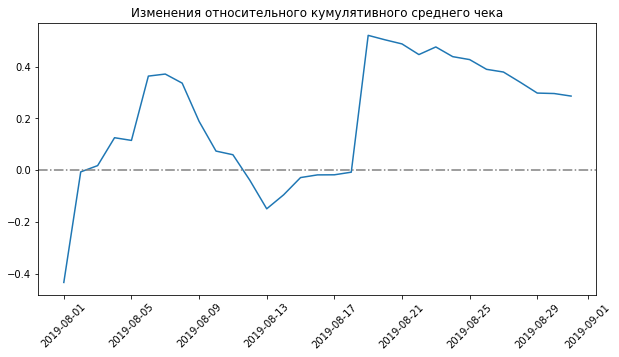

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['revenue_b'] / merged_cumulative['orders_b']) / (merged_cumulative['revenue_a'] / merged_cumulative['orders_a']) -1
)
plt.xticks(rotation=45)
plt.title('Изменения относительного кумулятивного среднего чека')
#plt.axis(ymin=-0.5, ymax=0.6)
plt.axhline(y=0, color='grey', linestyle='-.');

В данных действительно присутствуют аномально крупные заказы, но теперь нужно будет проверить и более рание даты.

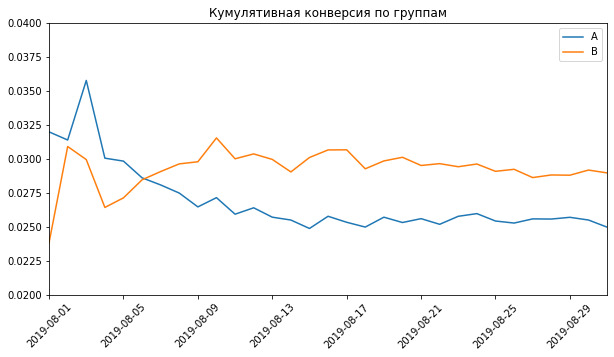

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['orders'] / cumulative_a['visitors'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['orders'] / cumulative_b['visitors'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия по группам')
plt.axis(xmin=cumulative_a['date'].min(), xmax=cumulative_a['date'].max(), ymin=.020, ymax=0.04)
plt.legend();

Конверсия изначально имела выбросы, но по итогу выравнивалась. Группа В лидирует.

In [26]:
merged_cumulative.sample()

,date,revenue_a,orders_a,visitors_a,revenue_b,orders_b,visitors_b
5,2019-08-06,515332,114,3985,690490,112,3935


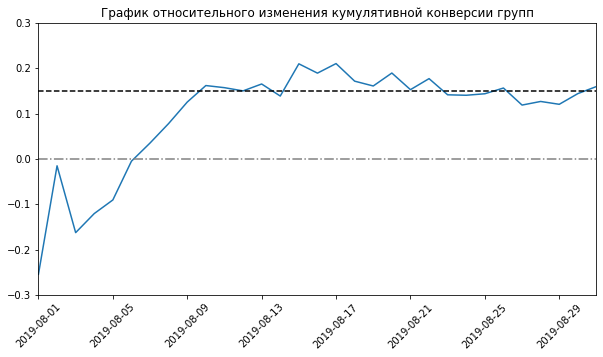

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['orders_b'] / merged_cumulative['visitors_b']) / (merged_cumulative['orders_a'] / merged_cumulative['visitors_a']) -1
)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии групп')
plt.axis(xmin=merged_cumulative['date'].min(), xmax=merged_cumulative['date'].max(), ymin=-0.30, ymax=0.3)
plt.axhline(y=0, color='grey', linestyle='-.')
plt.axhline(y=0.15, color='black', linestyle='--');

Группа В изначально пошла на обгон группы А и теперь стабильно находится в значениях выше группы А.

<a id='part_3.6'></a>
### Изучим аномалии.

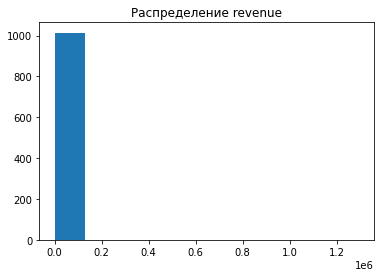

In [28]:
plt.hist(orders['revenue'])
plt.title('Распределение revenue');

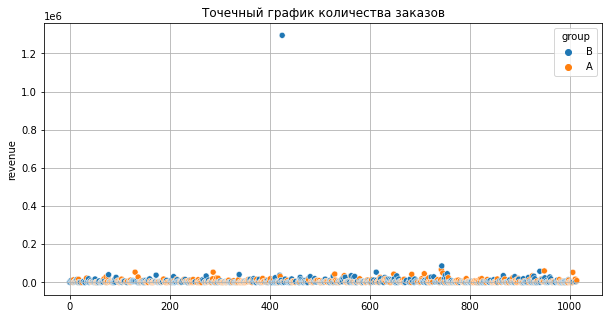

In [29]:
x_values = pd.Series(range(0,orders['revenue'].count())) # сериес для 

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders)
plt.grid()
plt.title('Точечный график количества заказов');

По второму графику можно заметить один аномальный заказ, который портит график целой группе, нужно будет от него избавиться.

[26785. 53904.]


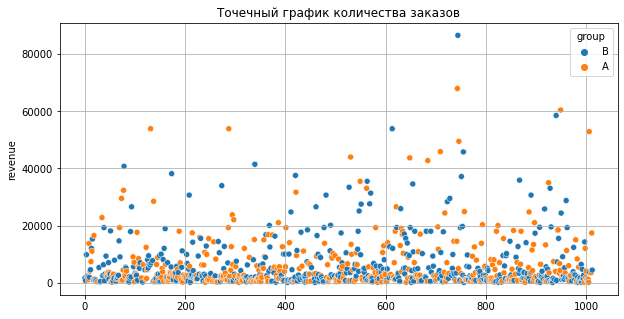

In [30]:
orders_clean = orders.query('revenue<200000')
x_values = pd.Series(range(0,orders_clean['revenue'].count())) # сериес для оси Х
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders_clean)
plt.grid()
plt.title('Точечный график количества заказов');
print(np.percentile(orders['revenue'], [95, 99]))

В более детальном разборе всё в порядке, нужно удалить всё, что выше 95 перцентиля.

In [31]:
per_95 = np.percentile(orders['revenue'], [95])[0]
orders_clean = orders.query('revenue<= @per_95')

Удалили аномально дорогие заказы, проверим.

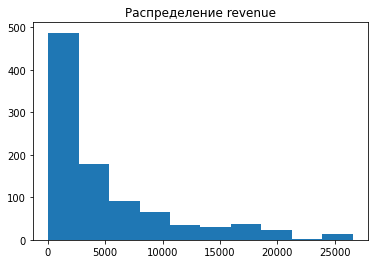

In [32]:
plt.hist(orders_clean['revenue'])
plt.title('Распределение revenue');

Таблица очищена от аномально дорогих заказов.

<a id='part_3.7'></a>
### Изучим количество заказов.

In [33]:
orders_by_users = (orders.groupby('visitorId')['revenue'].count()
                   .reset_index()
                   .rename(columns={'revenue':'orders'}))

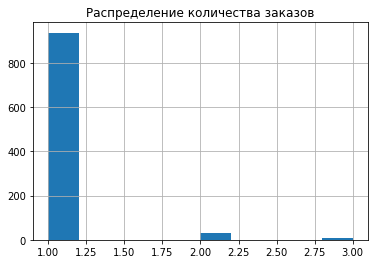

In [34]:

orders_by_users['orders'].hist()
plt.title('Распределение количества заказов');

Клиенты делают обычно 1 заказ, редко 2 и еще реже 3.

[1. 2.]


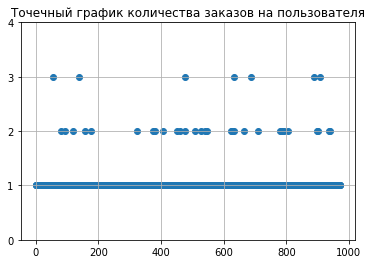

In [35]:
x_values = pd.Series(range(0,orders_by_users['orders'].count())) # сериес для оси х
plt.scatter(data=orders_by_users, x=x_values, y='orders') 
plt.grid()
plt.title('Точечный график количества заказов на пользователя')
plt.yticks([0,1,2,3,4]);
print(np.percentile(orders_by_users['orders'], [95, 99]))

На основе данных уберем пользователей которые делают более двух заказов.


In [36]:
per_99 = np.percentile(orders_by_users['orders'], [99])[0]
orders_by_users_clean = orders_by_users.query('orders<= @per_99')

In [37]:
orders_clean = orders_clean.loc[orders_clean['visitorId'].isin(orders_by_users_clean['visitorId'])]

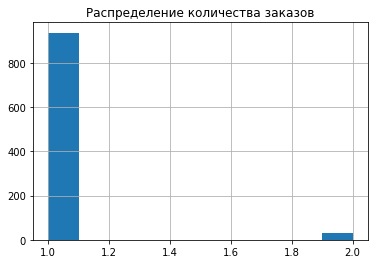

In [38]:
orders_by_users_clean['orders'].hist()
plt.title('Распределение количества заказов');

<a id='part_3.8'></a>
### Вывод:

Таким образом мы анализировали результаты А/B теста, избавились от аномалий и подготовили итоговые таблицы. С учётом аномалий группа В казалась предпочтительнее. Проведем проверку на статистическую значимость, чтобы определить, какая из групп на самом деле преподчтительнее.

## Шаг. Часть 2 Статистическая значимость

Используем критерий Манна-Уитни, поскольку с большой долей вероятности можно утверждать, что данные распределены ненормально.

In [39]:
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

### Сформируем таблицы с пользователями без заказов

* Вычитаем из общего числа визитов число заказов, получаем количество пользователей, которые не совершили заказ
* Формируем сериес, в котором все значения будут равны 0, а количество таких значений это как раз результат операции описанной выше.
* Объединяем с пользователями, которые делали заказы

In [40]:
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')
# создаем выборки с сырыми данными для стат тестов
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])

`H0` - конверсия группы А = конверсии группы В

`H1` - конверсии групп не равны

Примем для себя уровень значимости alpha = .05

In [41]:

print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.01102
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%


Так как p_value меньше заданного значения alpha, то мы отвергаем гипотизу о равенстве средний конверсий. 

Далее изучим различие среднего чека по сырым данным.

`H0` - средний чек группы А = чеку группы В

`H1` - средний чек групп не равен

Примем для себя уровень значимости alpha = .05

In [42]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

p_value: 0.82949
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95


Несмотря на разницу среднего чека в 2000 у.е., тест показывает, что мы не можем отвергнуть нулевую гипотизу о равенстве средних. То есть, такое различие не статистически значимо.

Это все были сырые данные, теперь посмотрим на очищенных.

### Проведение очистки данных.

In [43]:
orders_by_usersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')
# создаем выборки с чистыми данными для стат тестов
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.01374
Средняя конверсия (очищенная) группы А: 2.3%
Средняя конверсия (очищенная) группы B: 2.7%


На очищенных данных ситуация с конверсией почти не изменилась, только конверсия немного уменьшилась. Группа В, по прежнему, в лидерах по конверсии. Отвергаем H0 о равенстве конверсий.

In [44]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])[1]
))
print('Средний чек (очищенный) группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек (очищенный) группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))

p_value: 0.60479
Средний чек (очищенный) группы А: 5135.96
Средний чек (очищенный) группы B: 4855.19


Мы по прежнему не можем отвергнуть нулевую гипотезу о равенстве среднего чека. Больше нет такой большой разницы между группа А и В по среднему чеку.


### Подготовим данные для визуализации кумулятивной выручки.

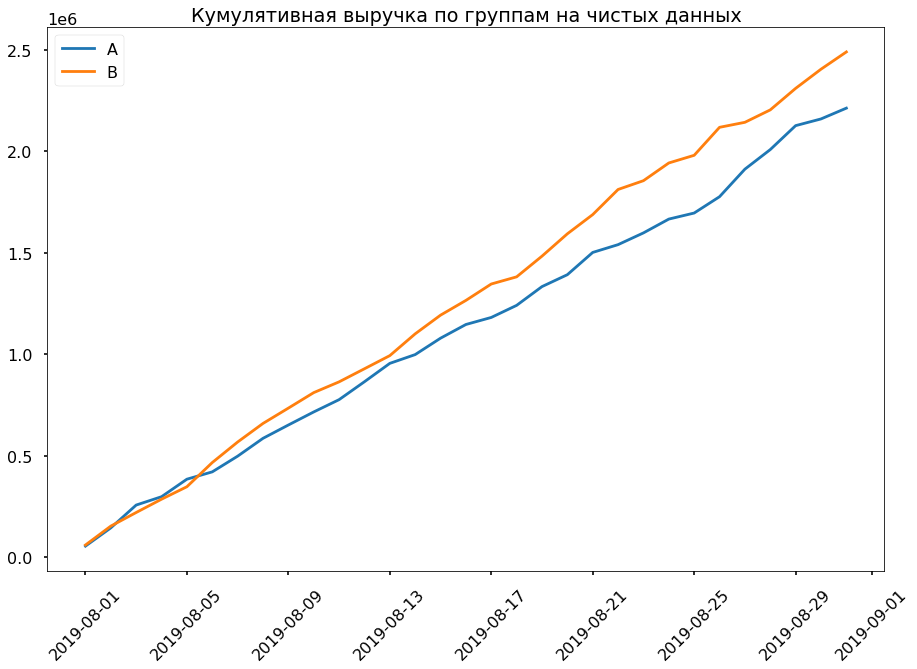

In [45]:
orders_aggregated = (dates_groups
                     .apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date']
                                                            , orders_clean['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))
                    
orders_aggregated.rename(columns={'transactionId':'orders_clean'}, inplace=True)

visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()



from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Построим график кумулятивной выручки по группам, предварительно изучив количество заказов в каждой из групп
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders_clean','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders_clean','visitors']]
plt.style.use('seaborn-poster')
plt.figure(figsize=(15, 10))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам на чистых данных')
plt.legend(loc='best');

##  Шаг. Вывод:

**По результатам проведенного исследования, можно выделить:**

1) Группа В стабильно лучше группы А, даже при очистке данных от аномалий и выбросов.

2) Средний чек не показал статистически значимых различий между группами. Но у группы В он выше.

*На основе приведенных данных можно заканчивать тестирование и выделить победу группы В.*


**Замечания разработчикам:**

Одни и те же клиенты попадали в разные группы, что могло повлиять на результат тестирования.